In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# As of the writing of this script, there is a bug in the csv kaleidoscope output, so another script
# had to be correct this bug prior to processing said data
df = pd.read_csv("for_data_science_fall_fixed.csv")
df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE
0,Accipiter-bicolor-451839.wav,5.66857,0.3605,0.4399,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.847,alarce 11/22/2021,02:11:43
1,Accipiter-bicolor-451839.wav,5.66857,0.9982,0.2215,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.849,alarce 11/22/2021,02:11:43
2,Accipiter-bicolor-451839.wav,5.66857,0.8004,0.1949,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.848,alarce 11/22/2021,02:11:43
3,Accipiter-bicolor-451839.wav,5.66857,1.2049,0.3690,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.850,alarce 11/22/2021,02:11:43
4,Accipiter-bicolor-451839.wav,5.66857,1.5857,0.2215,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.850,alarce 11/22/2021,02:11:43
...,...,...,...,...,...,...,...,...,...,...,...
31021,Zonotrichia-capensis-232609.wav,98.85600,63.2772,1.8301,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.174,JacobGlennAyers 10/10/2021,02:06:40
31022,Zonotrichia-capensis-232609.wav,98.85600,34.1554,2.4702,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.135,JacobGlennAyers 10/10/2021,02:06:40
31023,Zonotrichia-capensis-377483.wav,18.25960,0.5762,3.2199,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.527,JacobGlennAyers 10/18/2021,17:33:36
31024,Zonotrichia-capensis-377483.wav,18.25960,6.8160,2.1500,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.543,JacobGlennAyers 10/18/2021,17:33:36


In [3]:
# Separating the users from the date in the "LAST MOD BY" Column
for row in df.index:
    old_last_mod_by_string = df["LAST MOD BY"][row]
    username = old_last_mod_by_string.split(" ")[0]
    date = old_last_mod_by_string.split(" ")[1]
    df["LAST MOD BY"][row] = username
    df["LAST MOD DATE"][row] = date
df.to_csv("DSC180A_Annotations4.csv",index=False)

C:\Users\17149\miniconda3\envs\species-id\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\17149\miniconda3\envs\species-id\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
# Once some patches are released to Pyrenote, we can start this script from here
df = pd.read_csv("DSC180A_Annotations4.csv")
df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE
0,Accipiter-bicolor-451839.wav,5.66857,0.3605,0.4399,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.847,alarce,11/22/2021
1,Accipiter-bicolor-451839.wav,5.66857,0.9982,0.2215,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.849,alarce,11/22/2021
2,Accipiter-bicolor-451839.wav,5.66857,0.8004,0.1949,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.848,alarce,11/22/2021
3,Accipiter-bicolor-451839.wav,5.66857,1.2049,0.3690,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.850,alarce,11/22/2021
4,Accipiter-bicolor-451839.wav,5.66857,1.5857,0.2215,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.850,alarce,11/22/2021
...,...,...,...,...,...,...,...,...,...,...,...
31021,Zonotrichia-capensis-232609.wav,98.85600,63.2772,1.8301,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.174,JacobGlennAyers,10/10/2021
31022,Zonotrichia-capensis-232609.wav,98.85600,34.1554,2.4702,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.135,JacobGlennAyers,10/10/2021
31023,Zonotrichia-capensis-377483.wav,18.25960,0.5762,3.2199,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.527,JacobGlennAyers,10/18/2021
31024,Zonotrichia-capensis-377483.wav,18.25960,6.8160,2.1500,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.543,JacobGlennAyers,10/18/2021


## Keeping track of number of annotations created by users 

In [5]:
# Creating a list of users that have contributed to the Pyrenote project
# and then counting how many annotations they have created
username_list = df["LAST MOD BY"].to_list()
user_annotation_count_dict = dict()
for ndx in username_list:
    user_annotation_count_dict[ndx] = user_annotation_count_dict.get(ndx,0) + 1
print(user_annotation_count_dict)

{'alarce': 5496, 'EdZamora': 7038, 'weszhen': 4105, 'dnelson': 2362, 'j4yang': 1819, 'kkong': 3433, 'hjagarla': 3466, 'sunqiaochen': 2760, 'JacobGlennAyers': 289, 'kushagra1067': 228, 'admin_user': 30}


## Keeping track of number of clips annotated by users 

In [6]:
# creating a unique list of usernames
usernames = list(dict.fromkeys(username_list))
user_clip_count_list = []
for user in usernames:
    user_df = df[df["LAST MOD BY"] == user]
    clips = user_df["IN FILE"].to_list()
    clips = list(dict.fromkeys(clips))
    user_clip_count_list.append(len(clips))
zipper = zip(usernames,user_clip_count_list)
user_clip_count_dict = dict(zipper)
print(user_clip_count_dict)

{'alarce': 416, 'EdZamora': 301, 'weszhen': 350, 'dnelson': 210, 'j4yang': 202, 'kkong': 304, 'hjagarla': 311, 'sunqiaochen': 300, 'JacobGlennAyers': 17, 'kushagra1067': 21, 'admin_user': 1}


## Statistics on the length of annotations 

In [7]:
# Function copy-pasted directly from PyHa
def annotation_duration_statistics(df):
    """
    Function that calculates basic statistics related to the duration of
    annotations of a Pandas Dataframe compatible with PyHa.
    Args:
        df (Pandas Dataframe)
            - Automated labels or manual labels.
    Returns:
        Pandas Dataframe containing count, mean, mode, standard deviation, and
        IQR values based on annotation duration.
    """
    # Reading in the Duration column of the passed in dataframe as a Python
    # list
    annotation_lengths = df["DURATION"].to_list()
    # converting to numpy array which has more readily available statistics
    # functions
    annotation_lengths = np.asarray(annotation_lengths)
    # Converting the Python list to a numpy array
    entry = {'COUNT': np.shape(annotation_lengths)[0],
             'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],
             'MEAN': np.mean(annotation_lengths),
             'STANDARD DEVIATION': np.std(annotation_lengths),
             'MIN': np.amin(annotation_lengths),
             'Q1': np.percentile(annotation_lengths, 25),
             'MEDIAN': np.median(annotation_lengths),
             'Q3': np.percentile(annotation_lengths, 75),
             'MAX': np.amax(annotation_lengths)}
    # returning the dictionary as a pandas dataframe
    return pd.DataFrame.from_dict([entry])

In [8]:
# Breakdown of the annotation lengths in seconds
annotation_duration_statistics(df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,31026,0.3,1.088127,1.805118,0.0,0.36,0.62,1.18,143.3169


## Statistics on how long it is taking to label clips

In [9]:
# Creating a list of unique clips
clip_list = df["IN FILE"].to_list()
clip_list = list(dict.fromkeys(clip_list))

In [10]:
# Finding the largest of the "TIME_SPENT" column with respect to each clip, we consider this to be how long
# the user spent annotating that clip
annotation_time_list = []
for clip in clip_list:
    clip_df = df[df["IN FILE"] == clip]
    annotation_times_wrt_clip = clip_df["TIME_SPENT"].to_list()
    total_time_spent = max(annotation_times_wrt_clip)
    annotation_time_list.append(total_time_spent)
annotation_time_wrt_clip_dict = {"CLIP" : clip_list, "DURATION" : annotation_time_list}
# This dataframe shows the clip name and how long it took to annotate said clip in each row.
annotation_time_wrt_clip_df = pd.DataFrame.from_dict(annotation_time_wrt_clip_dict)

In [11]:
annotation_time_wrt_clip_df 

,CLIP,DURATION
0,Accipiter-bicolor-451839.wav,955.256
1,Accipiter-collaris-260335.wav,150.719
2,Accipiter-collaris-260336.wav,763.721
3,Accipiter-poliogaster-40546.wav,2659.080
4,Accipiter-poliogaster-121768.wav,432.976
...,...,...
2416,Zimmerius-gracilipes-258668.wav,77.551
2417,Zimmerius-gracilipes-258669.wav,217.081
2418,Zonotrichia-capensis-47546.wav,112.787
2419,Zonotrichia-capensis-232609.wav,623.199


In [12]:
# Numerical breakdown in seconds
annotation_duration_statistics(annotation_time_wrt_clip_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,2421,15.0,477.550501,1866.424909,2.437,38.015,77.76,233.108,64339.4


In [13]:
# Doing the same analysis in minutes
annotation_time_wrt_clip_df["DURATION"] = annotation_time_wrt_clip_df["DURATION"]/60.0
annotation_duration_statistics(annotation_time_wrt_clip_df)
# Seems to me that I will need to do some analysis that throws out outliers. I think the problem is when someone
# goes to annotate a clip, leaves for a few hours, then resumes their work

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,2421,0.38,7.959175,31.107082,0.040617,0.633583,1.296,3.885133,1072.323333


In [14]:
def annotation_duration_histogram(
    annotation_df,
    n_bins = 6,
    min_length = None,
    max_length = None,
    save_fig = False,
    title = "Annotation Length Histogram",
    filename = "annotation_histogram.png"):
    """
    Function to build a histogram so a user can visually see the length of 
    the annotations they are working with. 
    Args:
        annotation_df (Dataframe)
            - Dataframe of automated or human labels
        n_bins (int)
            - number of histogram bins in the final histogram
            - default: 6
            
        min_length (int)
            - minimum length of the audio clip
            - default: 0s
        max_length (int)
            - maximum length of the audio clip
            - default: 60s
        save_fig (boolean)
            - Whether or not the histogram should be saved as a file.
            - default: False
        filename (string)
            - Name of the file to save the histogram to.
            - default: "annotation_histogram.png"
    Returns:
        Histogram of the length of the annotations.
    """
    # Create the initial histogram
    duration = annotation_df["DURATION"].to_list()
    sns_hist = sns.histplot(
        data=duration,
        bins=n_bins,
        line_kws=dict(edgecolor="k", linewidth=2),
        stat="count")

    # Modify the length of the x-axis as specified
    if max_length is not None and min_length is not None:
        if max_length < min_length:
            raise ValueError("max_length cannot be less than `min_length")
        plt.xlim(min_length, max_length)
    elif max_length is not None:
        plt.xlim(right=max_length)
    elif min_length is not None:
        plt.xlim(left=min_length)

    # Set title and the labels
    sns_hist.set_title(title)
    sns_hist.set(xlabel="Annotation Length (s)", ylabel = "Count")

    # Save the histogram if specified
    if save_fig: 
        sns_hist.get_figure().savefig(filename)

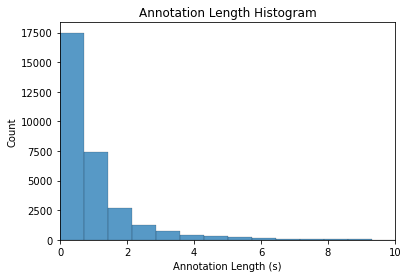

In [15]:
annotation_duration_histogram(df,n_bins = 200,min_length=0.0,max_length=10.0)

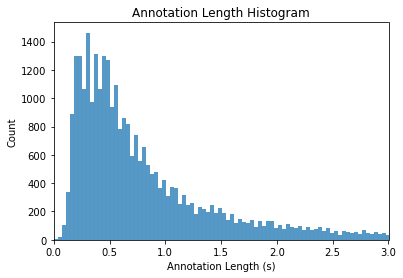

In [18]:
annotation_duration_histogram(df,n_bins = 4000,min_length=0,max_length=3.0)